In [1]:
from laspy.file import File
import numpy as np
import pandas as pd
import laspy
import scipy
from scipy.spatial.kdtree import KDTree
import numpy as np
import csv
import numpy as np
import laspy
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import laspy
import numpy as np

In [25]:
inFile = File('C:/Users/athit/Desktop/For Submission/Processing point clouds/clouds/second_km.las', mode='r')
input_las = laspy.file.File("clouds/second_km.las", mode="r")

In [26]:
header=inFile.header

In [27]:
type(inFile)

laspy.file.File

In [28]:
# Get GPS TIME range of the las file
coor = np.vstack([inFile.get_gps_time]).transpose()

In [29]:
ds = pd.DataFrame(coor)

In [30]:
inFile.get_gps_time

<bound method File.get_gps_time of <laspy.file.File object at 0x0000015B8445EEB8>>

In [31]:
# Grab a numpy dataset of our clustering dimensions:
dataset = np.vstack([inFile.X, inFile.Y, inFile.Z]).transpose()

In [32]:
# Build the KD Tree
tree = scipy.spatial.KDTree(dataset)

In [33]:
# This should do the same as the FLANN example above, though it might
# be a little slower.
tree.query(dataset[100,], k = 5)

(array([ 0.        ,  4.69041576, 10.19803903, 32.71085447, 38.8458492 ]),
 array([100, 101, 102,  95, 878]))

In [40]:
# Get arrays which indicate VALID X, Y, or Z values.
X_invalid = np.logical_and((inFile.header.min[0] <= inFile.x),
(inFile.header.max[0] >= inFile.x))
Y_invalid = np.logical_and((inFile.header.min[1] <= inFile.y),
(inFile.header.max[1] >= inFile.y))
Z_invalid = np.logical_and((inFile.header.min[2] <= inFile.z),
(inFile.header.max[2] >= inFile.z))
good_indices = np.where(np.logical_and(X_invalid, Y_invalid, Z_invalid))
good_points = inFile.points[good_indices]
output_file = File("C:/Users/athit/Desktop/new Try/Processing point clouds/output.las", mode = "w", header = inFile.header)
output_file.points = good_points
output_file.close()

In [35]:
inFile.header.min[0]

505312.811

In [36]:
inFile.header.max[0]

505368.454

In [37]:
inFile.x

array([505322.526, 505322.728, 505323.658, ..., 505363.23 , 505363.238,
       505363.253])

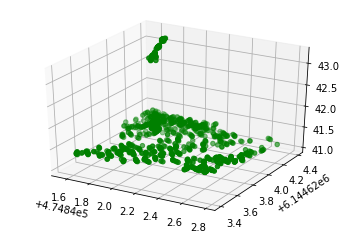

In [38]:
point_records = input_las.points.copy()
las_scaleX = input_las.header.scale[0]
las_offsetX = input_las.header.offset[0]
las_scaleY = input_las.header.scale[1]
las_offsetY = input_las.header.offset[1]
las_scaleZ = input_las.header.scale[2]
las_offsetZ = input_las.header.offset[2]
p_X = np.array((point_records['point']['X'] * las_scaleX) + las_offsetX)
p_Y = np.array((point_records['point']['Y'] * las_scaleY) + las_offsetY)
p_Z = np.array((point_records['point']['Z'] * las_scaleZ) + las_offsetZ)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(p_X, p_Y, p_Z, c='g', marker='o')
plt.show()